Best parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0}
Accuracy: 0.864406779661017
Precision: 0.9090909090909091
Recall: 0.9090909090909091


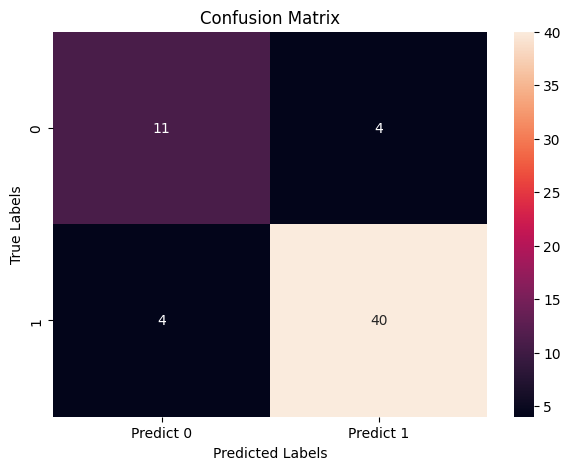

Specificity: 0.7333333333333333
False Positive Rate: 0.26666666666666666
ACCURACY of model is:  86.4406779661017
SENSITIVITY of the model is:  90.9090909090909
PRECISION of the model is:  90.9090909090909


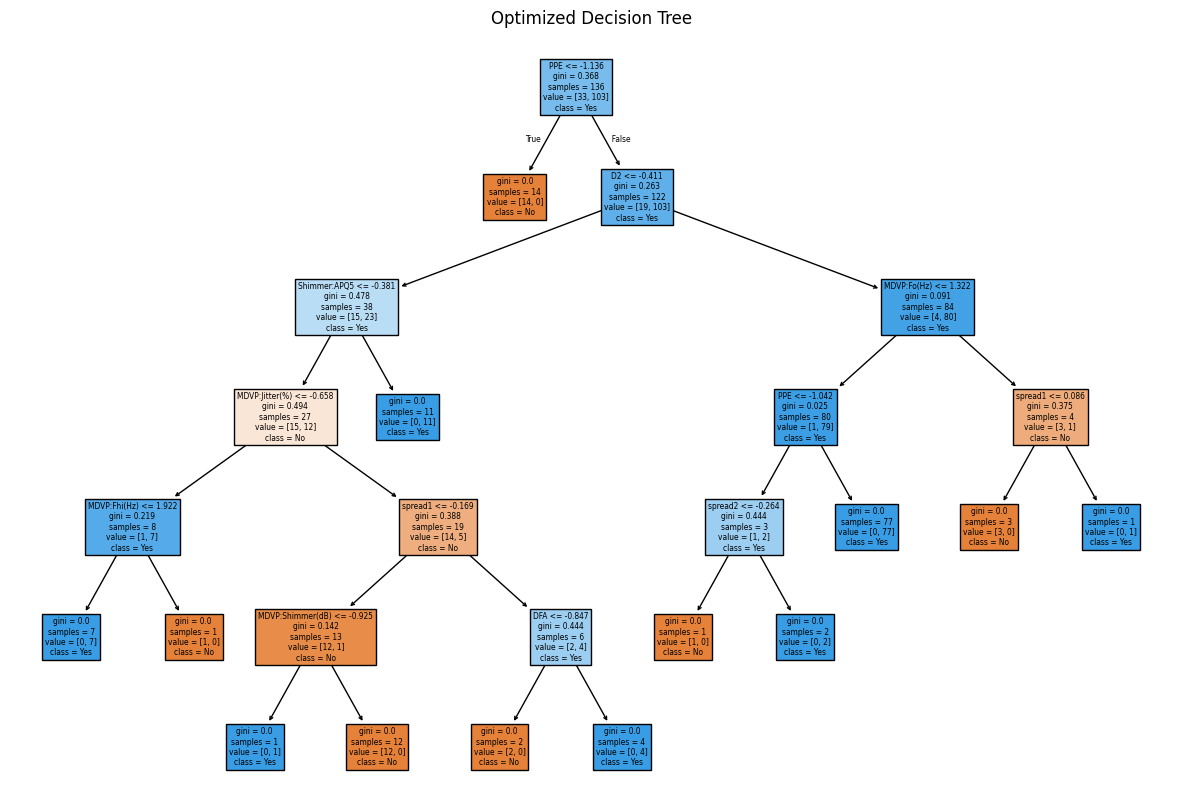

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from scipy.stats import zscore

# Load the dataset
data_path = 'Data - Parkinsons.csv'
pdata = pd.read_csv(data_path)

# Data preprocessing
pdata = pdata.drop(['name'], axis=1)
X = pdata.drop(['status'], axis=1)
y = pdata[['status']]
X_scaled = X.apply(zscore)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

# Extended parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, 11, 13, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'min_weight_fraction_leaf': [0.0, 0.01, 0.05],
    'max_leaf_nodes': [None, 10, 20, 50, 100],
    'min_impurity_decrease': [0.0, 0.01, 0.1]
}

# Create a DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train.values.ravel())

# Best model
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)
y_pred = best_dt.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Confusion matrix
df_cm = pd.DataFrame(conf_matrix, index=['0', '1'], columns=['Predict 0', 'Predict 1'])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Additional metrics
TN, FP, FN, TP = conf_matrix.ravel()
specificity = TN / (TN + FP)
false_positive_rate = FP / (TN + FP)
print(f"Specificity: {specificity}")
print(f"False Positive Rate: {false_positive_rate}")
print('ACCURACY of model is: ',(TP+TN)/float(TP+TN+FN+FP)*100)
print('SENSITIVITY of the model is: ',TP / float(TP + FN)*100)
print('PRECISION of the model is: ',TP / float(TP + FP)*100)

# Visualize the decision tree
fn = list(X_train.columns)
cn = ['No', 'Yes']
plt.figure(figsize=(15, 10))
plot_tree(best_dt, feature_names=fn, class_names=cn, filled=True)
plt.title('Optimized Decision Tree')
plt.savefig('optimized_tree.png')
plt.show()